<a href="https://colab.research.google.com/github/0rC0/TVBCourse/blob/master/TVBCourse_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Virtual Course 
#Personalized Multi-Scale Brain Simulation

_*Homework 1  07.01.2021*_ 		

_*Torsten Rakoll, Andrea Dell’Orco, Laura Göschel*_

Critical post-review of the paper:

Wang, L., Zang, Y., He, Y., Liang, M., Zhang, X., Tian, L., Wu, T., Jiang, T., & Li, K. (2006). Changes in hippocampal connectivity in the early stages of Alzheimer’s disease: Evidence from resting state fMRI. NeuroImage, 31(2), 496–504. https://doi.org/10.1016/j.neuroimage.2005.12.033



# Example FSL-based Fieldmaps based EPI distortion correction

### Install ***FSL*** 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/TVBCourse_Ex1/FSL_images')

In [66]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/TVBCourse_Ex1/FSL_images'

In [67]:
# Add Neurodebian to souces.list
#!wget -O- http://neuro.debian.net/lists/bionic.de-md.full | sudo tee /etc/apt/sources.list.d/neurodebian.sources.list
#!sudo apt-key adv --recv-keys --keyserver hkp://pool.sks-keyservers.net:80 0xA5D32F012649A5A9

In [68]:
# Install FSL from Neurodebian
#!sudo apt-get update
#!sudo apt-get install fsl-complete

In [76]:
#Install nilearn
#!pip install nilearn

In [78]:
from nilearn import plotting as plot

### Fieldmaps based distortion correction with FSL

In [124]:
#References:
#   https://fsl.fmrib.ox.ac.uk/fslcourse/lectures/practicals/registration/index.html
#   https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FUGUE/Guide#Step_5_-_Regularising_the_fieldmap
#   https://www.fmrib.ox.ac.uk/primers/intro_primer/ExBox19/IntroBox19.html

Steps

1) Skulltripping and erosion of Magnitude

2) Use of phase and magnitude from 1 to produce a fieldmap in rad/s

3) EPI correction and coregistration

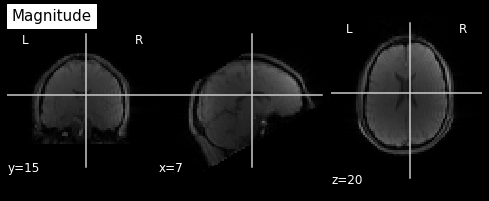

In [115]:
plot.plot_anat('./FMAP_MAG.nii.gz', title='Magnitude')

In [74]:
#Skullstrip Magnitude
!fsl5.0-bet FMAP_MAG.nii.gz FMAP_MAG_brain

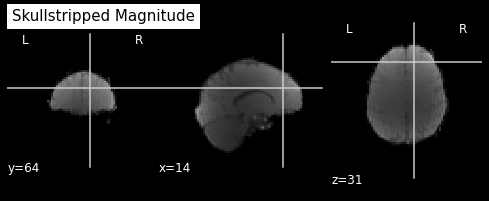

In [116]:
plot.plot_anat('./FMAP_MAG_brain.nii.gz', title='Skullstripped Magnitude')

In [82]:
!fsl5.0-fslmaths FMAP_MAG_brain -ero FMAP_MAG-brain_ero

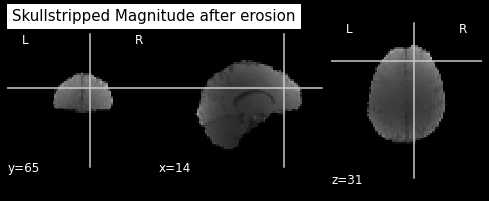

In [117]:
plot.plot_anat('./FMAP_MAG-brain_ero.nii.gz', title='Skullstripped Magnitude after erosion')

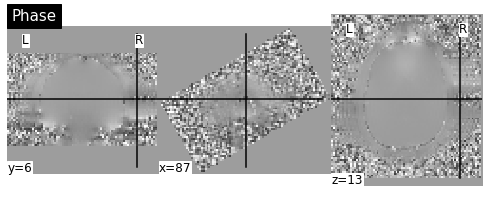

In [118]:
plot.plot_anat('./FMAP_PHASE.nii.gz', title='Phase')

In [95]:
!fsl5.0-fsl_prepare_fieldmap SIEMENS FMAP_PHASE.nii.gz FMAP_MAG-brain_ero.nii.gz fmap_rads.nii.gz 2.46

Loading volumes
Phase loaded
Magnitude loaded
Mask loaded
Rewrapping phase range to [-pi,pi]
Number of phase splits = 8
Calculating starting matrices (887 by 887)
Finished connection_matrices
2502 constraints left
Did while loop 886 times
Done. Created fmap_rads for use with FEAT.


In [96]:
ls

FMAP_MAG-brain_ero.nii.gz  FMAP_MAG.nii.gz    fmap_rads.nii.gz  FUNC.nii.gz
FMAP_MAG_brain.nii.gz      FMAP_PHASE.nii.gz  FMAPS.txt         STRUCT.nii.gz


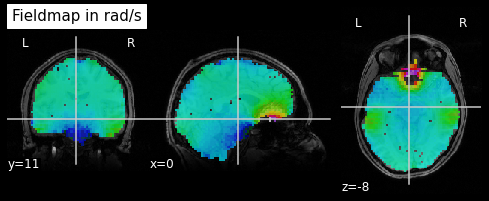

In [119]:
plot.plot_roi('./fmap_rads.nii.gz','./STRUCT.nii.gz', title='Fieldmap in rad/s')

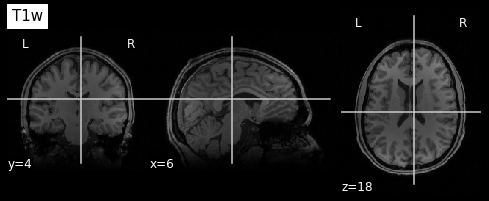

In [120]:
plot.plot_anat('./STRUCT.nii.gz', title='T1w')

In [108]:
#Skullstrip Anatomical
!fsl5.0-bet STRUCT.nii.gz struct_brain

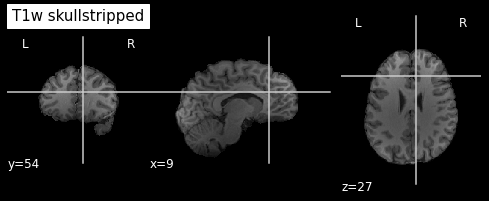

In [121]:
plot.plot_anat('./struct_brain.nii.gz', title='T1w skullstripped')

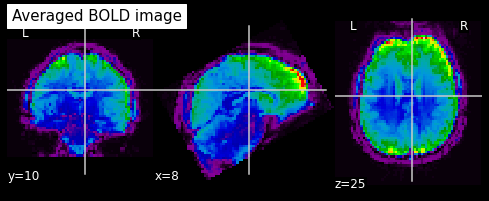

In [122]:
from nilearn.image.image import mean_img
plot.plot_epi(mean_img('FUNC.nii.gz'), title='Averaged BOLD image')

In [111]:
!fsl5.0-epi_reg --epi=FUNC.nii.gz --t1=STRUCT.nii.gz --t1brain=struct_brain.nii.gz --out=func_fmap_corrected.nii.gz

Running FAST segmentation
FLIRT pre-alignment
Running BBR
0.487010 0.999983 -0.000588 -0.005754 0.000000 0.000642 0.999956 0.009398 0.000000 0.005748 -0.009402 0.999939 0.000000 -0.239965 1.309405 3.490818 1.000000 
/usr/share/fsl/5.0/bin/epi_reg: line 378:  9479 Killed                  $FSLDIR/bin/applywarp -i ${vepi} -r ${vrefhead} -o ${vout} --premat=${vout}.mat --interp=spline


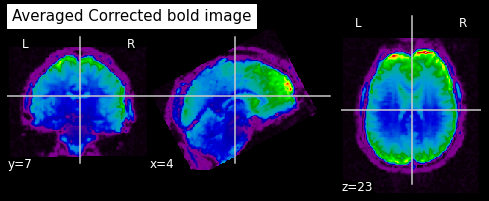

In [123]:
from nilearn.image.image import mean_img
plot.plot_epi(mean_img('func_fmap_corrected.nii.gz'), title="Averaged Corrected bold image")

In [125]:
# The EPI corrected image is visually better then the souce image